In [2]:
import sys
sys.path.insert(0, '../../python_dms/lib/')
from tools_dms import *
from dms import *
from PIL import Image
import scipy.io as sio
import matplotlib.pyplot as plt
import scipy.io
import time 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import os
def prox_L1(x, tau):
    return x - np.maximum(np.minimum(x, tau), -tau)

def optD(self, x):
    if canal == 3:
        y = np.zeros((rows, cols, 2, canal))
        y[:, :, 0, :] = (np.concatenate((x[:, 1:, :] - x[:, 0:-1, :], np.zeros((rows, 1, canal))),axis=1,)/ 2.0 )
        y[:, :, 1, :] = (np.concatenate( (x[1:, :, :] - x[0:-1, :, :], np.zeros((1, cols, canal))),axis=0,)/ 2.0)
        return y
    elif canal == 1:
        y = np.zeros((rows, cols, 2))
        # # print(temp.shape)
        y[:, :, 0] = (np.concatenate((x[:, 1:] - x[:, 0:-1], np.zeros((rows, 1))), axis=1)/ 2.0)
        y[:, :, 1] = (np.concatenate((x[1:, :] - x[0:-1, :], np.zeros((1, cols))), axis=0 )/ 2.0)
        return y

def optDadjoint( x):
    if canal == 3:
        y1 = (np.concatenate((x[:, 0, 0, :].reshape(rows, 1, 3),x[:, 1:-1, 0, :] - x[:, 0:-2, 0, :],-x[:, -2, 0, :].reshape(rows, 1, 3),),axis=1,)/ 2) 
        y2 = (np.concatenate((x[0, :, 1, :].reshape(1, cols, 3),x[1:-1, :, 1, :] - x[:-2, :, 1, :],-x[-2, :, 1, :].reshape(1, cols, 3),),axis=0,)/ 2)
        y = -y1 - y2
        return y
    elif self.canal == 1:
        y1 = (np.concatenate((x[:, 0, 0].reshape(rows, 1), x[:, 1:-1, 0] - x[:, 0:-2, 0],-x[:, -2, 0].reshape(rows, 1),),axis=1,)/ 2.0)
        y2 = ( np.concatenate(( x[0, :, 1].reshape(1, cols),x[1:-1, :, 1] - x[:-2, :, 1],-x[-2, :, 1].reshape(1, cols),),axis=0,)/ 2.0)
        y = -y1 - y2
        return y

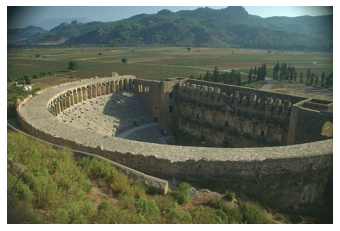

In [9]:
valid_extensions = ['.jpg', '.jpeg', '.png', '.gif','.mat']  # Add more extensions if needed
np.random.seed(0)
# folder_path= "../../../BSDS500/data/images/train/"
folder_path= "../../../../../Documents/dataset/BSDS500/data/images/train/"

idim=0
for filename in os.listdir(folder_path):
    if os.path.splitext(filename)[1].lower() in valid_extensions:
        image_path = os.path.join(folder_path, filename)
        image_name= os.path.splitext(filename)[0]
        x = np.array(Image.open(image_path))/255.
        r,l,_ = np.shape(x)
        delta= 0.05
        z = x+ delta*np.random.normal(0,1,x.shape)
        plt.figure()
        plt.imshow(x)
        plt.axis('off')
        plt.show()
        
        idim+=1 
        if idim ==1:
            break